In [15]:
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 

In [16]:
ruta_archivo_csv = 'Files/data_v1.csv'

data = pd.read_csv(ruta_archivo_csv, index_col=0)

data

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,NaN,684.0,NaN,6,3,NaN,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,NaN,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,NaN,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,NaN,19999.0,5678,0,NaN,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,NaN,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,NaN,19.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,20.0,NaN,5,6,1976,no
4,46,No,NaN,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,Yes,travel_rarely,530.0,NaN,3,1,life sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,married,10325.0,5518,1,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7,1987,no
1610,45,No,non-travel,805.0,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4447.0,23163,1,NaN,12.0,3.0,2.0,NaN,0.0,NaN,5.0,2.0,9.0,NaN,0,8,1978,yes
1611,39,No,travel_rarely,903.0,NaN,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,2560,0,no,18.0,3.0,4.0,NaN,0.0,9.0,3.0,3.0,8.0,NaN,0,7,1984,yes
1612,36,No,non-travel,1229.0,NaN,8,4,technical degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,divorced,NaN,25952,4,no,13.0,NaN,4.0,NaN,2.0,12.0,3.0,3.0,7.0,NaN,0,7,1987,yes


In [17]:
data_copia = data.copy()
data_copia.head(1)

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,NaN,684.0,NaN,6,3,NaN,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,NaN,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes


**Gestión de nulos categóricos**   

- Moda: Businesstravel, Overtime   
- 'Unknown': Educationfield, Gender, Maritalstatus   
- A revisar: Department, Jobrole

In [18]:
columnas_moda = ['Businesstravel', 'Overtime']
columnas_desc = ['Educationfield', 'Gender', 'Maritalstatus']

In [19]:
#Moda

for col in columnas_moda:
    moda = data_copia[col].mode()[0]
    data_copia[col] = data_copia[col].fillna(moda)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data_copia[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Businesstravel    0
Overtime          0
dtype: int64

In [20]:
for col in columnas_desc:
    data_copia[col] = data_copia[col].fillna("unknown")

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data_copia[columnas_desc].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Educationfield    0
Gender            0
Maritalstatus     0
dtype: int64

**Gestión de nulos numéricos**   
- Mediana: EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance   
- Revisar: 'Dailyrate', 'EmployeeNumber', 'Joblevel', 'Totalworkingyears', 'Yearsatcompany'   
- Eliminar: 

In [21]:
columnas_mediana = ['Environmentsatisfaction', 'Hourlyrate',
    'Jobinvolvement', 'Jobsatisfaction', 'Performancerating', 'Relationshipsatisfaction',
    'Stockoptionlevel', 'Trainingtimeslastyear',
    'Worklifebalance']

for col in columnas_mediana:
    mediana = data_copia[col].median()
    data_copia[col] = data_copia[col].fillna(mediana)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data_copia[columnas_mediana].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Environmentsatisfaction     0
Hourlyrate                  0
Jobinvolvement              0
Jobsatisfaction             0
Performancerating           0
Relationshipsatisfaction    0
Stockoptionlevel            0
Trainingtimeslastyear       0
Worklifebalance             0
dtype: int64

In [22]:
data_copia[['Dailyrate', 'Joblevel', 'Totalworkingyears', 'Yearsatcompany']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dailyrate,1484.0,803.570081,402.347571,103.0,469.75,800.5,1157.0,1499.0
Joblevel,1586.0,2.064943,1.102424,1.0,1.00,2.0,3.0,5.0
Totalworkingyears,1071.0,11.265173,7.664379,0.0,6.00,10.0,15.0,40.0
Yearsatcompany,1586.0,7.059899,6.027870,0.0,3.00,5.0,9.0,40.0


In [23]:
data_copia.head()

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no


In [24]:
data_copia.isnull().sum()

Age                            0
Attrition                      0
Businesstravel                 0
Dailyrate                    123
Department                  1305
Distancefromhome               0
Education                      0
Educationfield                 0
Employeenumber               440
Environmentsatisfaction        0
Gender                         0
Hourlyrate                     0
Jobinvolvement                 0
Joblevel                      21
Jobrole                       21
Jobsatisfaction                0
Maritalstatus                  0
Monthlyincome                840
Monthlyrate                    0
Numcompaniesworked             0
Overtime                       0
Percentsalaryhike              0
Performancerating              0
Relationshipsatisfaction       0
Standardhours               1190
Stockoptionlevel               0
Totalworkingyears            536
Trainingtimeslastyear          0
Worklifebalance                0
Yearsatcompany                21
Yearsincur

In [25]:
df_nulos = pd.DataFrame((data_copia.isnull().sum() / data_copia.shape[0]) * 100, columns = ["%_nulos"])

df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Dailyrate,7.654014
Department,81.207218
Employeenumber,27.380212
Joblevel,1.306783
Jobrole,1.306783
Monthlyincome,52.271313
Standardhours,74.051027
Totalworkingyears,33.354076
Yearsatcompany,1.306783
Yearsincurrentrole,97.946484


------

CATEGÓRICAS = Department, Jobrole   
NUMÉRICAS = 'Dailyrate', 'Joblevel', 'Totalworkingyears', 'Yearsatcompany'

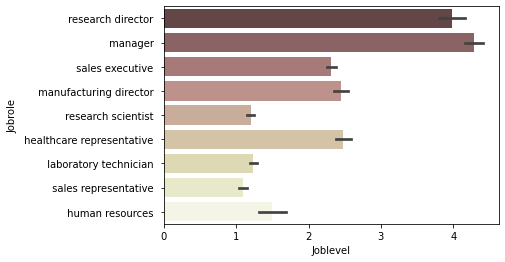

In [26]:
sns.barplot(y = "Jobrole", 
            x = "Joblevel", 
            data = data_copia, 
            palette = "pink");

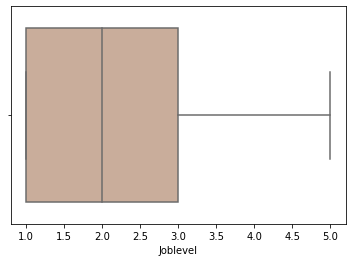

In [27]:
sns.boxplot(x = "Joblevel", 
            data = data_copia,
            palette= "pink");

In [28]:
data_copia["Joblevel"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [29]:
data_copia[data_copia["Joblevel"] == 5][['Joblevel', 'Jobrole']]

,Joblevel,Jobrole
0,5.0,research director
1,5.0,manager
2,5.0,manager
9,5.0,research director
10,5.0,research director
...,...,...
1485,5.0,research director
1493,5.0,manager
1508,5.0,research director
1525,5.0,research director


In [30]:
data_copia[["Joblevel", "Jobrole", "Department"]].sample(10)

,Joblevel,Jobrole,Department
1037,1.0,research scientist,NaN
1131,1.0,human resources,NaN
527,1.0,research scientist,NaN
633,1.0,laboratory technician,NaN
1599,NaN,NaN,NaN
125,3.0,sales executive,NaN
1034,4.0,manufacturing director,NaN
1442,1.0,research scientist,NaN
1512,1.0,human resources,research & development
162,2.0,laboratory technician,NaN


**ELIMINAR LAS FILAS CON LOS NULOS: 1593-1613**

In [31]:
data_copia.reset_index(drop=True, inplace=True)

In [32]:
data_copia.iloc[1586:1607,:]

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
1586,36,No,non-travel,1434.0,NaN,8,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,7587.0,14229,1,no,15.0,3.0,2.0,80.0,0.0,10.0,1.0,3.0,10.0,NaN,0,9,1987,yes
1587,29,No,travel_rarely,657.0,NaN,27,3,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,4335.0,25549,4,no,12.0,3.0,1.0,NaN,1.0,11.0,3.0,2.0,8.0,NaN,1,1,1994,yes
1588,38,No,travel_rarely,240.0,NaN,2,4,life sciences,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,5980.0,26085,6,no,12.0,3.0,4.0,NaN,0.0,17.0,2.0,3.0,15.0,NaN,4,12,1985,no
1589,40,No,travel_rarely,791.0,NaN,2,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,4244.0,9931,1,no,24.0,4.0,4.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,3,7,1983,yes
1590,42,No,travel_frequently,570.0,NaN,8,3,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,16225,1,no,13.0,3.0,3.0,NaN,1.0,NaN,3.0,3.0,NaN,NaN,14,9,1981,yes
1591,36,No,travel_rarely,676.0,NaN,1,3,other,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,5228.0,23361,0,no,15.0,3.0,1.0,NaN,1.0,NaN,2.0,3.0,9.0,NaN,0,5,1987,yes
1592,29,No,travel_rarely,NaN,NaN,23,2,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2700.0,23779,1,no,24.0,4.0,3.0,NaN,1.0,10.0,3.0,3.0,10.0,NaN,0,7,1994,no
1593,55,Yes,travel_rarely,436.0,NaN,2,1,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,NaN,21519,4,no,16.0,3.0,3.0,80.0,0.0,NaN,3.0,2.0,9.0,NaN,7,3,1968,yes
1594,28,No,travel_rarely,760.0,sales,43,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,3698,1,no,20.0,4.0,1.0,NaN,0.0,8.0,2.0,3.0,8.0,NaN,7,5,1995,no
1595,26,Yes,travel_rarely,NaN,NaN,5,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2366.0,20898,1,no,14.0,3.0,1.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,1,7,1997,yes


In [33]:
data_eliminado = data_copia.drop(data_copia.index[1586:1607])

In [34]:
data_eliminado

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,28,Yes,travel_rarely,654.0,research & development,1,2,unknown,966.0,3.0,M,93.0,3.0,2.0,manufacturing director,1.0,unknown,2216.0,3872,7,yes,13.0,3.0,4.0,80.0,0.0,10.0,4.0,3.0,7.0,NaN,3,7,1995,yes
1582,36,No,travel_rarely,427.0,research & development,8,3,unknown,972.0,3.0,H,57.0,3.0,2.0,laboratory technician,2.0,married,11713.0,20335,9,no,14.0,3.0,1.0,80.0,1.0,10.0,2.0,3.0,8.0,NaN,0,5,1987,no
1583,30,No,travel_rarely,501.0,NaN,35,5,marketing,NaN,1.0,H,41.0,4.0,3.0,sales executive,3.0,divorced,5304.0,25275,7,no,23.0,3.0,4.0,80.0,1.0,10.0,2.0,2.0,8.0,NaN,7,7,1993,no
1584,56,No,travel_rarely,NaN,NaN,9,3,unknown,990.0,1.0,H,84.0,3.0,2.0,sales executive,4.0,married,11103.0,20420,7,no,11.0,3.0,3.0,NaN,0.0,30.0,1.0,2.0,10.0,NaN,1,1,1967,yes


In [35]:
nulos = data_eliminado[data_eliminado[["Joblevel", "Jobrole"]].isnull().any(axis=1)]
nulos

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework


In [36]:
data_eliminado.to_csv("Files/data_v2.csv")

In [37]:
nulos = data_copia[data_copia[["Joblevel", "Jobrole"]].isnull().any(axis=1)]
nulos

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
1586,36,No,non-travel,1434.0,NaN,8,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,7587.0,14229,1,no,15.0,3.0,2.0,80.0,0.0,10.0,1.0,3.0,10.0,NaN,0,9,1987,yes
1587,29,No,travel_rarely,657.0,NaN,27,3,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,4335.0,25549,4,no,12.0,3.0,1.0,NaN,1.0,11.0,3.0,2.0,8.0,NaN,1,1,1994,yes
1588,38,No,travel_rarely,240.0,NaN,2,4,life sciences,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,5980.0,26085,6,no,12.0,3.0,4.0,NaN,0.0,17.0,2.0,3.0,15.0,NaN,4,12,1985,no
1589,40,No,travel_rarely,791.0,NaN,2,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,4244.0,9931,1,no,24.0,4.0,4.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,3,7,1983,yes
1590,42,No,travel_frequently,570.0,NaN,8,3,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,16225,1,no,13.0,3.0,3.0,NaN,1.0,NaN,3.0,3.0,NaN,NaN,14,9,1981,yes
1591,36,No,travel_rarely,676.0,NaN,1,3,other,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,5228.0,23361,0,no,15.0,3.0,1.0,NaN,1.0,NaN,2.0,3.0,9.0,NaN,0,5,1987,yes
1592,29,No,travel_rarely,NaN,NaN,23,2,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2700.0,23779,1,no,24.0,4.0,3.0,NaN,1.0,10.0,3.0,3.0,10.0,NaN,0,7,1994,no
1593,55,Yes,travel_rarely,436.0,NaN,2,1,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,NaN,21519,4,no,16.0,3.0,3.0,80.0,0.0,NaN,3.0,2.0,9.0,NaN,7,3,1968,yes
1594,28,No,travel_rarely,760.0,sales,43,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,3698,1,no,20.0,4.0,1.0,NaN,0.0,8.0,2.0,3.0,8.0,NaN,7,5,1995,no
1595,26,Yes,travel_rarely,NaN,NaN,5,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2366.0,20898,1,no,14.0,3.0,1.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,1,7,1997,yes


In [38]:
(data_copia["Joblevel"].value_counts() / data_copia.shape[0])*100

2.0    36.341008
1.0    36.092097
3.0    14.623522
4.0     7.031736
5.0     4.604854
Name: Joblevel, dtype: float64

In [39]:
porcentaje_nulos_por_fila = pd.DataFrame((data_copia.isnull().sum(axis=1) / len(data_copia.columns)) * 100, columns = ["%_nulos"])
porcentaje_nulos_por_fila[porcentaje_nulos_por_fila["%_nulos"] >= 20]

,%_nulos
183,20.000000
1509,20.000000
1590,25.714286
1591,20.000000
1592,20.000000
1593,20.000000
1595,20.000000
1600,20.000000
1602,22.857143
1603,20.000000


In [101]:
data = pd.read_csv("Files/data_v2.csv", index_col=0)

data

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,28,Yes,travel_rarely,654.0,research & development,1,2,unknown,966.0,3.0,M,93.0,3.0,2.0,manufacturing director,1.0,unknown,2216.0,3872,7,yes,13.0,3.0,4.0,80.0,0.0,10.0,4.0,3.0,7.0,NaN,3,7,1995,yes
1582,36,No,travel_rarely,427.0,research & development,8,3,unknown,972.0,3.0,H,57.0,3.0,2.0,laboratory technician,2.0,married,11713.0,20335,9,no,14.0,3.0,1.0,80.0,1.0,10.0,2.0,3.0,8.0,NaN,0,5,1987,no
1583,30,No,travel_rarely,501.0,NaN,35,5,marketing,NaN,1.0,H,41.0,4.0,3.0,sales executive,3.0,divorced,5304.0,25275,7,no,23.0,3.0,4.0,80.0,1.0,10.0,2.0,2.0,8.0,NaN,7,7,1993,no
1584,56,No,travel_rarely,NaN,NaN,9,3,unknown,990.0,1.0,H,84.0,3.0,2.0,sales executive,4.0,married,11103.0,20420,7,no,11.0,3.0,3.0,NaN,0.0,30.0,1.0,2.0,10.0,NaN,1,1,1967,yes


# Cambiar nulos columnas categóricas por "unknow"

In [102]:
data.head(5)

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no


In [103]:
categoricas = ['Businesstravel','Overtime','Educationfield','Maritalstatus']

In [104]:
for col in categoricas:
    data[col] = data[col].fillna("unknown")

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data[categoricas].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Businesstravel    0
Overtime          0
Educationfield    0
Maritalstatus     0
dtype: int64

# Cambiar columnas numéricas por la mediana 

In [105]:
data[['Environmentsatisfaction', 'Hourlyrate',
    'Jobinvolvement', 'Jobsatisfaction', 'Performancerating', 'Relationshipsatisfaction',
    'Stockoptionlevel', 'Trainingtimeslastyear',
    'Worklifebalance']].describe().transpose()[['mean', '50%']]

,mean,50%
Environmentsatisfaction,2.691047,3.0
Hourlyrate,62.508827,64.0
Jobinvolvement,2.738966,3.0
Jobsatisfaction,2.732661,3.0
Performancerating,3.133039,3.0
Relationshipsatisfaction,2.713745,3.0
Stockoptionlevel,0.794451,1.0
Trainingtimeslastyear,2.807692,3.0
Worklifebalance,2.779950,3.0


In [106]:
columnas_mediana = ['Environmentsatisfaction',
    'Jobinvolvement', 'Jobsatisfaction', 'Performancerating', 'Relationshipsatisfaction',
    'Stockoptionlevel', 'Trainingtimeslastyear','Worklifebalance', 'Dailyrate', 'Yearsatcompany']

for col in columnas_mediana:
    mediana = data[col].median()
    data[col] = data[col].fillna(mediana)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data[columnas_mediana].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Environmentsatisfaction     0
Jobinvolvement              0
Jobsatisfaction             0
Performancerating           0
Relationshipsatisfaction    0
Stockoptionlevel            0
Trainingtimeslastyear       0
Worklifebalance             0
Dailyrate                   0
Yearsatcompany              0
dtype: int64

# Elimnar columnas con nulos superiores al 40%

In [107]:
df_nulos = pd.DataFrame((data.isnull().sum() / data.shape[0]) * 100, columns = ["%_nulos"])

df_nulos[df_nulos["%_nulos"] > 40]

,%_nulos
Department,81.147541
Monthlyincome,52.459016
Standardhours,74.022699
Yearsincurrentrole,97.919294


In [112]:
data_v2 = data.drop(['Department', 'Monthlyincome', 'Standardhours', 'Yearsincurrentrole','Employeenumber','Totalworkingyears'], axis=1)

In [113]:
data_v2

,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,6,3,unknown,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,6462,7,no,13.0,3.0,3.0,0.0,5.0,3.0,20.0,15,15,1972,yes
1,52,No,travel_rarely,699.0,1,4,life sciences,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,5678,0,no,14.0,3.0,1.0,1.0,5.0,3.0,33.0,11,9,1971,yes
2,42,No,travel_rarely,532.0,4,2,technical degree,3.0,H,58.0,3.0,5.0,manager,4.0,married,4933,1,no,11.0,3.0,4.0,0.0,3.0,3.0,22.0,11,15,1981,yes
3,47,No,travel_rarely,359.0,2,4,medical,1.0,M,82.0,3.0,4.0,research director,3.0,married,26703,3,no,19.0,3.0,2.0,2.0,2.0,3.0,20.0,5,6,1976,no
4,46,No,travel_rarely,1319.0,3,3,technical degree,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,7739,2,no,12.0,3.0,4.0,1.0,5.0,3.0,19.0,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,28,Yes,travel_rarely,654.0,1,2,unknown,3.0,M,93.0,3.0,2.0,manufacturing director,1.0,unknown,3872,7,yes,13.0,3.0,4.0,0.0,4.0,3.0,7.0,3,7,1995,yes
1582,36,No,travel_rarely,427.0,8,3,unknown,3.0,H,57.0,3.0,2.0,laboratory technician,2.0,married,20335,9,no,14.0,3.0,1.0,1.0,2.0,3.0,8.0,0,5,1987,no
1583,30,No,travel_rarely,501.0,35,5,marketing,1.0,H,41.0,4.0,3.0,sales executive,3.0,divorced,25275,7,no,23.0,3.0,4.0,1.0,2.0,2.0,8.0,7,7,1993,no
1584,56,No,travel_rarely,804.0,9,3,unknown,1.0,H,84.0,3.0,2.0,sales executive,4.0,married,20420,7,no,11.0,3.0,3.0,0.0,1.0,2.0,10.0,1,1,1967,yes


In [114]:
data_v2.columns

Index(['Age', 'Attrition', 'Businesstravel', 'Dailyrate', 'Distancefromhome',
       'Education', 'Educationfield', 'Environmentsatisfaction', 'Gender',
       'Hourlyrate', 'Jobinvolvement', 'Joblevel', 'Jobrole',
       'Jobsatisfaction', 'Maritalstatus', 'Monthlyrate', 'Numcompaniesworked',
       'Overtime', 'Percentsalaryhike', 'Performancerating',
       'Relationshipsatisfaction', 'Stockoptionlevel', 'Trainingtimeslastyear',
       'Worklifebalance', 'Yearsatcompany', 'Yearssincelastpromotion',
       'Yearswithcurrmanager', 'Datebirth', 'Remotework'],
      dtype='object')

In [115]:
data_v2.isna().sum()

Age                         0
Attrition                   0
Businesstravel              0
Dailyrate                   0
Distancefromhome            0
Education                   0
Educationfield              0
Environmentsatisfaction     0
Gender                      0
Hourlyrate                  0
Jobinvolvement              0
Joblevel                    0
Jobrole                     0
Jobsatisfaction             0
Maritalstatus               0
Monthlyrate                 0
Numcompaniesworked          0
Overtime                    0
Percentsalaryhike           0
Performancerating           0
Relationshipsatisfaction    0
Stockoptionlevel            0
Trainingtimeslastyear       0
Worklifebalance             0
Yearsatcompany              0
Yearssincelastpromotion     0
Yearswithcurrmanager        0
Datebirth                   0
Remotework                  0
dtype: int64

In [ ]:
data_v2.to_csv("data_v3.csv")